<center><div style="direction:ltr;font-family:B Lotus, B Nazanin, Tahoma">In the name of Allah</div></center>
<h1><center><div style="direction:ltr;font-family:B Lotus, B Nazanin, Tahoma">Introducing the Hoda Dataset and tuning it for machine learning algorithms</div></center></h1>

## <div style="direction:ltr;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">Hoda: handwriten persian digits</div>
<p>
<a href="https://www.sciencedirect.com/science/article/pii/S0167865507000037" target="_blank">
H. Khosravi and E. Kabir, "Introducing a very large dataset of handwritten Farsi digits and a study on their varieties," Pattern Recognition Letters, vol. 28, pp. 1133-1141, 2007. ]
</a>    
</p>

## <div style="direction:ltr;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">loading the needed libraries</div>
<div style="direction:ltr;text-align:left;font-family:Tahoma">For importing these libraries you have run these commands seperately in you cmd(on windows)</div>
<p>pip install numpy</p>
<p>pip install scipy</p>
<p>pip install matplotlib</p>
<p>pip install scikit-image</p>

<div style="direction:ltr;text-align:left;font-family:Tahoma">
you can use conda instead of pip
</div>

In [2]:
import sys
sys.executable

'c:\\Users\\kaveh\\AppData\\Local\\anaconda3\\python.exe'

In [1]:
import numpy as np
# Never use * for import(collision of names)
from scipy import io
import matplotlib.pyplot as plt
from skimage.transform import resize

## <div style="direction:ltr;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">Loading The Hoda DataSet</div>
<div style="direction:ltr;text-align:left;font-family:Tahoma">
This dataset is published on whith a mat format(matlab). We can load it using scipy.io.loadmat
</div>


In [6]:
#load dataset
dataset = io.loadmat('./dataset/Data_hoda_full.mat')

In [6]:
type(dataset)

dict

In [7]:
#There are 5 key:value pairs in the dataset.
len(dataset)

5

In [8]:
# For building a supervised learning model, we need the Data and labels.
dataset.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels'])

In [11]:
# The dataset[Data] has 60000 rows and 1 column. So it is logical to get rid of the column dimension.
dataset["Data"].shape

(60000, 1)

In [13]:
# To get rid of the column, we use np.squeeze()
np.squeeze(dataset["Data"]).shape

(60000,)

In [14]:
# For printing the shapes of our data, we use a for loop and the indices of the data:
squeezed_data = np.squeeze(dataset["Data"])
# The range(indices) can go up to 60000
for i in range(10):
    print(squeezed_data[i].shape)

(27, 20)
(20, 21)
(10, 15)
(36, 17)
(36, 28)
(12, 14)
(26, 27)
(27, 28)
(13, 19)
(27, 20)


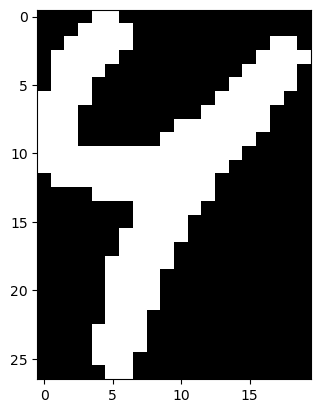

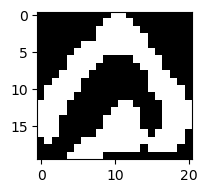

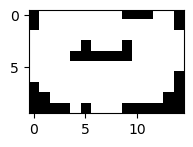

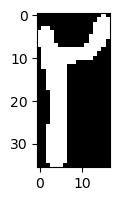

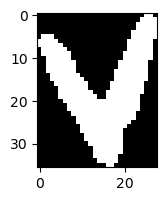

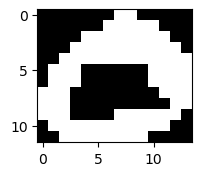

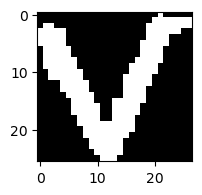

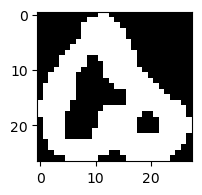

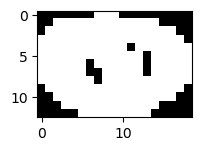

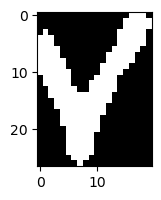

<Figure size 200x200 with 0 Axes>

In [19]:
# For preveting the images from overriding the previous ones,
# we use figure(figsize=(2,2)) to create a new figure each time.
for i in range(10):
    plt.imshow(squeezed_data[i],cmap = 'gray')
    # figsize = (2,2) is 2 inches by 2 inches
    plt.figure(figsize=(2,2))

## <div style="direction:ltr;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">Selecting our train and test data</div>
<div style="direction:ltr;text-align:left;font-family:Tahoma">
There are 60000 images in the dataset.
<br>
For research purpose we will take 1000 for training and the next 200 for testing.
<br>
--> important note: the test data must not be used, only for testing purposes.
</div>

In [7]:
#test and training set
X_train_orginal = np.squeeze(dataset['Data'][:1000])
y_train = np.squeeze(dataset['labels'][:1000])
X_test_original = np.squeeze(dataset['Data'][1000:1200])
y_test = np.squeeze(dataset['labels'][1000:1200])

"squeeze": Remove single-dimensional entries from the shape of an array.

<div style="direction:ltr;text-align:left;font-family:Tahoma">
Lets take a look at our data :)
</div>

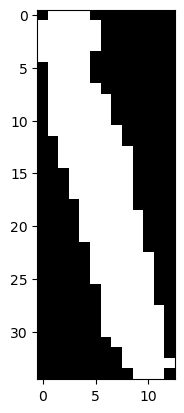

In [4]:
plt.imshow(X_train_orginal[999], cmap='gray')
plt.show()

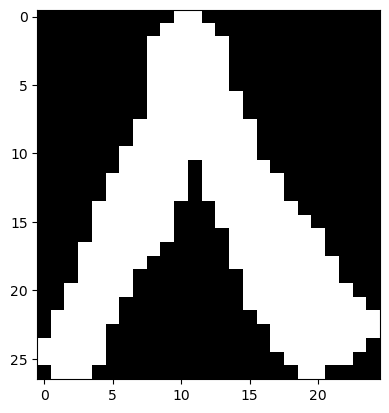

Label 70th image is: 8


In [5]:
i=70
image = X_train_orginal[i]
label = y_train[i]
plt.imshow(image, cmap='gray')
plt.show()
print("Label {}th image is: {}".format(i, label))# i is the index of the image.

<div style="direction:ltr;text-align:left;font-family:Tahoma">
Feel free to change the i for a different image</div>

## <div style="direction:ltr;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">Resizing images of our dataset</div>
<div style="direction:ltr;text-align:left;font-family:Tahoma">
The images sizes variates <br>
We make the size of all the images to be the same 5 by 5!
</div>

In [8]:
#resize
X_train_5by5 = [resize(img, (5, 5)) for img in X_train_orginal]
X_test_5by_5 = [resize(img, (5, 5)) for img in X_test_original]

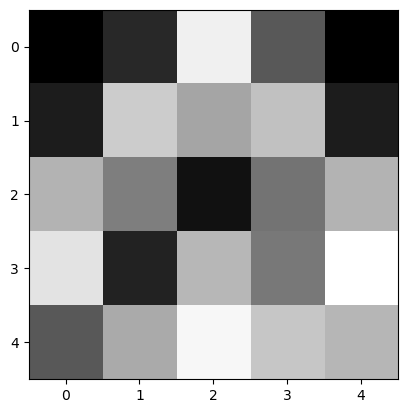

In [7]:
image = X_train_5by5[1]
plt.imshow(image, cmap='gray')
plt.show()

## <div style="direction:ltr;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">Changing the shapes of our images</div>
<div style="direction:ltr;text-align:left;font-family:Tahoma">
Now we take those 5 by 5 images and convert them to a 25(5*5) vector for giving it to our machine learning algorithem
</div>


In [9]:
#reshape
X_train = [x.reshape(25) for x in X_train_5by5]
X_test = [x.reshape(25) for x in X_test_5by_5]

In [9]:
X_train[0].shape

(25,)

In [10]:
np.shape(X_train)# 1000 vectors(images) of 25 in size(pixels)

(1000, 25)

### <div style="direction:ltr;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">
    Classic computer vision:
    <br>==> the feature extraction and ML was seperated from each other
</div>
<div style="direction:ltr;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">
    Deep computer vision:
    <br>==> the feature extraction is inside the classification model (no need to extract the features !!!!)
</div>

<h1><center><div style="direction:ltr;font-family:B Lotus, B Nazanin, Tahoma">Using KNN(K nearest neighbours) for classification</div></center></h1>

In [2]:
from sklearn.neighbors import KNeighborsClassifier

### <div style="direction:ltr;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">
    using the knn, first initiate it, and then fit the data into the knn model
</div>

In [10]:
# We assume the K to be 3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Now is time for the fun part
* predicting the test data, but bare in mind the the input shape is (1,25)
* so we can use [ ] to give our input an extra dimension

after resizing:  AxesImage(size=(5, 5))
before resizing:  AxesImage(size=(25, 12))
Sample 24 is a 9, and you prediction is: 9.


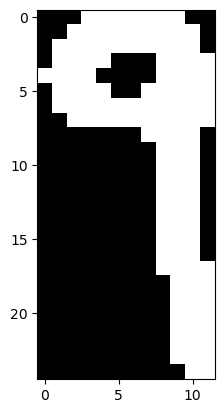

In [13]:
sample = 24

X = [X_test[sample]]

predicted_class = neigh.predict(X)
actual_class = y_test[sample]
print("after resizing: ",plt.imshow(X_test[sample].reshape(5,5),cmap='gray'))
print("before resizing: ",plt.imshow(X_test_original[sample],cmap='gray'))
print ("Sample {} is a {}, and you prediction is: {}.".format(sample, actual_class, predicted_class[0]))

## We can give it our own image to predict using paint, but it must be titely croped for it to work and the size must be around 20*20 or lower

In [65]:
paint_img = plt.imread("./image/handwritten_in_paint_01.png")

In [66]:
gray_scale_paint_img = ((paint_img[:,:,0]/3 +  paint_img[:,:,1]/3 + paint_img[:,:,2]/3)*255).astype('uint8')

In [67]:
gray_scale_paint_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255,   0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 255, 255,   0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 255,   0,   0, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0,   0, 255,   0,   0,   0, 255,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0,   0, 255, 255,   0,   0],
       [  0,   0,   0, 255, 255,   0,   0,   0,   0,   0, 255,   0,   0],
       [  0,   0,   0, 255,   0,   0,   0,   0,   0,   0, 255, 255,   0],
       [  0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255],
       [  0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0, 

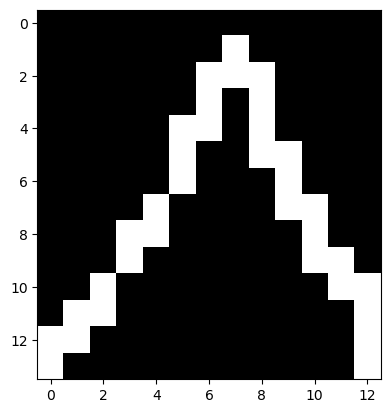

In [68]:
plt.imshow(gray_scale_paint_img,cmap='gray')

In [69]:
gspi_resize = resize(gray_scale_paint_img,(5,5))
gspir_reshape = gspi_resize.reshape([1,25])

In [70]:
gspi_resize

array([[0.00000000e+00, 2.63472900e-03, 2.96579140e-01, 1.63443389e-01,
        9.20177375e-05],
       [7.13160596e-07, 6.88518427e-02, 5.69619467e-01, 4.22220917e-01,
        4.23062706e-03],
       [3.13968347e-03, 2.75466240e-01, 1.38596772e-01, 4.47231417e-01,
        1.20951995e-01],
       [1.46150564e-01, 3.47725541e-01, 5.03951051e-03, 1.05760438e-01,
        5.75806466e-01],
       [6.16436326e-01, 4.78626311e-02, 1.13977145e-06, 9.67865593e-04,
        3.00361794e-01]])

In [71]:
neigh.predict(gspir_reshape)

array([8], dtype=uint8)

# Accuracy

In [72]:
acc = neigh.score(X_test, y_test)
print ("Accuracy is %.2f %%" %(acc*100))

Accuracy is 96.50 %


# THE END
## done by kaveh karimadini